In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [3]:
data, info = tfds.load('mnist', with_info=True)

In [4]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [5]:
img_shape = info.features['image'].shape

In [6]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [7]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 1s 53ms/step - loss: 2.2965 - val_loss: 2.2836
Epoch 2/20
20/20 [==============================] - 1s 26ms/step - loss: 2.2835 - val_loss: 2.2710
Epoch 3/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2707 - val_loss: 2.2548
Epoch 4/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2490 - val_loss: 2.2310
Epoch 5/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2124 - val_loss: 2.2017
Epoch 6/20
20/20 [==============================] - 1s 26ms/step - loss: 2.1843 - val_loss: 2.1671
Epoch 7/20
20/20 [==============================] - 1s 25ms/step - loss: 2.1655 - val_loss: 2.1268
Epoch 8/20
20/20 [==============================] - 1s 26ms/step - loss: 2.1240 - val_loss: 2.0790
Epoch 9/20
20/20 [==============================] - 1s 25ms/step - loss: 2.0358 - val_loss: 2.0198
Epoch 10/20
20/20 [==============================] - 1s 26ms/step - loss: 1.9847 - val_loss: 1.9568
Epoch 11/

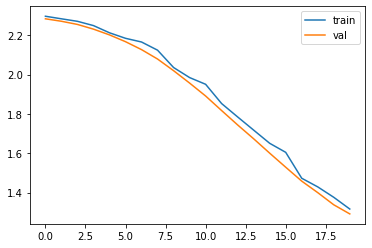

In [10]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

<ipython-input-11-ac955d30006d>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(model.predict(ds_test.take(1))[9, :])


Text(0.5, 0, 'Probability')

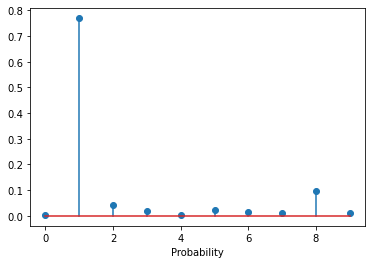

In [11]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [12]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = labels.astype(np.int32)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


4423680/4422102 [==============================] - 0s 0us/step


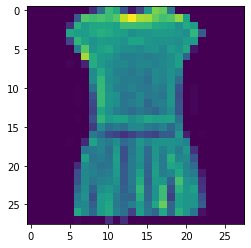

In [13]:
plt.imshow(images[3, :, :, :].squeeze())

In [14]:
# your code here
model = tfk.Sequential()

# block 1
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

# block 2
model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

# block 3
model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

# flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 16)          2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 8)          

In [20]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 0s 20ms/step - loss: 2.3169 - val_loss: 2.2978
Epoch 2/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2947 - val_loss: 2.2932
Epoch 3/20
20/20 [==============================] - 0s 17ms/step - loss: 2.2965 - val_loss: 2.2924
Epoch 4/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2845 - val_loss: 2.2747
Epoch 5/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2847 - val_loss: 2.2701
Epoch 6/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2782 - val_loss: 2.2591
Epoch 7/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2613 - val_loss: 2.2473
Epoch 8/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2597 - val_loss: 2.2303
Epoch 9/20
20/20 [==============================] - 0s 18ms/step - loss: 2.2373 - val_loss: 2.2137
Epoch 10/20
20/20 [==============================] - 0s 19ms/step - loss: 2.2331 - val_loss: 2.2012
Epoch 11/

<ipython-input-21-ac955d30006d>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(model.predict(ds_test.take(1))[9, :])


Text(0.5, 0, 'Probability')

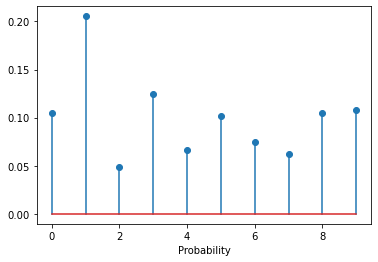

In [21]:

plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")


#|**Exercise - Transfer Learning**



In [22]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

Shuffling and writing examples to /Users/tianjiaoyu/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteN3LAJ1/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to /Users/tianjiaoyu/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteN3LAJ1/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to /Users/tianjiaoyu/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [23]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

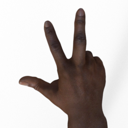
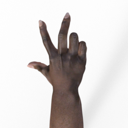
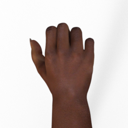
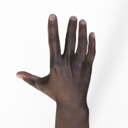
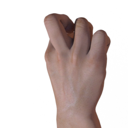
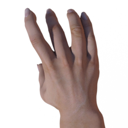
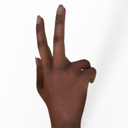
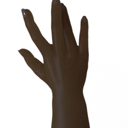
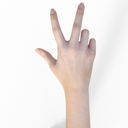
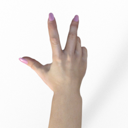

In [24]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [26]:
# Your code here
preprocess=lambda d: (tf.cast(d['image'],tf.float32)/255.0, d['label'])
ds_train=data['train'].map(preprocess).cache().batch(32).repeat().prefetch(10)
n_test=info.splits['test'].num_examples
ds_test=data['train'].map(preprocess).cache().take(n_test//4).batch(n_test//4).repeat().prefetch(2)
img_shape=info.features['image'].shape

In [27]:
model=tfk.Sequential([tfkl.InputLayer(img_shape),
                      tfkl.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)),
                      tfkl.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)), 
                      tfkl.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)),
                      tfkl.Flatten(),
                      tfkl.Dense(units=100, activation=tf.nn.relu),
                      tfkl.Dense(units=3, activation=tf.nn.softmax)
                      ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [28]:
opt=tfk.optimizers.Adam()
loss=tfk.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss)
results=model.fit(ds_train, steps_per_epoch=20, epochs=10, validation_data=ds_test, validation_steps=1)


Epoch 1/10
20/20 [==============================] - 14s 697ms/step - loss: 0.9836 - val_loss: 0.7417
Epoch 2/10
20/20 [==============================] - 13s 625ms/step - loss: 0.5251 - val_loss: 0.2839
Epoch 3/10
20/20 [==============================] - 12s 622ms/step - loss: 0.2073 - val_loss: 0.1249
Epoch 4/10
20/20 [==============================] - 12s 615ms/step - loss: 0.1165 - val_loss: 0.0841
Epoch 5/10
20/20 [==============================] - 12s 615ms/step - loss: 0.0632 - val_loss: 0.0963
Epoch 6/10
20/20 [==============================] - 12s 622ms/step - loss: 0.0425 - val_loss: 0.0656
Epoch 7/10
20/20 [==============================] - 12s 622ms/step - loss: 0.0259 - val_loss: 0.0366
Epoch 8/10
20/20 [==============================] - 12s 618ms/step - loss: 0.0154 - val_loss: 0.0270
Epoch 9/10
20/20 [==============================] - 12s 622ms/step - loss: 0.0306 - val_loss: 0.0717
Epoch 10/10
20/20 [==============================] - 13s 626ms/step - loss: 0.0052 - val_lo

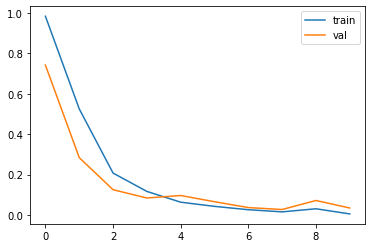

In [29]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=["train", "val"])

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [30]:
from tensorflow.keras.applications import VGG16

In [31]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

58892288/58889256 [==============================] - 1s 0us/step


Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [32]:
# Your code here
conv_base.trainable=False

In [33]:
model=tfk.Sequential([
                      tfkl.InputLayer(img_shape),
                      conv_base, 
                      tfkl.Conv2D(filters=8, kernel_size=(2,2),activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(2,2)),
                      tfkl.Flatten(), 
                      tfkl.Dense(32,activation=tf.nn.relu),
                      tfkl.Dense(3, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 8)           16392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 14,735,307
Trainable params: 20,619
Non-trainable params: 14,714,688
_____________________________________

In [34]:

opt=tfk.optimizers.Adam()
loss=tfk.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
results=model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test, validation_steps=1)

Epoch 1/20
20/20 [==============================] - 112s 6s/step - loss: 0.6416 - accuracy: 0.7984 - val_loss: 0.2194 - val_accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - 113s 6s/step - loss: 0.0951 - accuracy: 0.9969 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 3/20
20/20 [==============================] - 112s 6s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 112s 6s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 113s 6s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 114s 6s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 112s 6s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/20
20

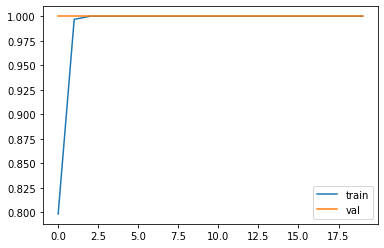

In [35]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(labels=["train", "val"])